# **Assignment Questions**

# **1.  What is NumPy, and why is it widely used in Python?**

NumPy (Numerical Python) is a fundamental library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of high-level mathematical functions to operate on these arrays.

1. Performance: NumPy operations are implemented in C and Fortran, making them significantly faster than equivalent operations performed on Python lists. This is crucial for large datasets.

2. Powerful N-dimensional Array Object (ndarray): The ndarray is a fast and efficient way to store and manipulate numerical data. It's the core of NumPy and enables vectorized operations.

3. Mathematical Functions: NumPy offers an extensive set of mathematical functions (e.g., linear algebra, Fourier transforms, random number generation) that operate efficiently on arrays.

4. Foundation for other Libraries: Many other scientific and data analysis libraries in Python, such as Pandas, SciPy, Matplotlib, and Scikit-learn, are built on top of NumPy. This makes NumPy an essential prerequisite for working with these libraries.

5. Simplified Syntax: It provides a much simpler and more intuitive syntax for complex mathematical operations compared to native Python lists and loops.


# **2. How does broadcasting work in NumPy?**

NumPy broadcasting is a powerful mechanism that allows NumPy to work with arrays of different shapes when performing arithmetic operations. It's designed to simplify operations between arrays of different sizes by implicitly 'stretching' the smaller array to match the shape of the larger array, without actually duplicating data.

# **Here's a breakdown of how it works:**

# **Broadcasting Rules:**

# Dimensions: If two arrays have different numbers of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.

**Size Compatibility:** Two dimensions are compatible when:
They are equal, or
One of them is 1.

**Incompatible Dimensions:** If the dimensions are incompatible (i.e., not equal and neither is 1), an error is raised.
How it Applies in Practice:

When NumPy performs an operation on two arrays, it compares their shapes element-wise, starting from the trailing dimension (the rightmost dimension). If the dimensions are compatible according to the rules above, the smaller dimension is 'broadcast' across the larger one. If they are incompatible, a ValueError is raised.

**Example:**
import numpy as np

a = np.array([[1, 2, 3], [4, 5, 6]]) # Shape (2, 3)
b = np.array([10, 20, 30])         # Shape (3,)

print(a + b)
In this example:

a has shape (2, 3).
b has shape (3,). According to Rule 1, b's shape is padded to (1, 3).
Now comparing shapes (2, 3) and (1, 3) from right to left:

Rightmost dimension (3 vs 3): They are equal, so compatible.
Next dimension (2 vs 1): One is 1, so compatible. The 1 in (1, 3) will be stretched to match 2.
The result will be an array of shape (2, 3). The array b is effectively applied row-wise to a.



# **3. What is a Pandas DataFrame?**

A Pandas DataFrame is a two-dimensional, tabular data structure with labeled axes (rows and columns). It's essentially like a spreadsheet or a SQL table in Python, offering powerful tools for data manipulation and analysis. It allows you to organize data in a structured way, where each column can hold different types of data, and you can easily perform operations like filtering, sorting, and aggregating data.

### Example: Basic DataFrame Operations

In [ ]:
import pandas as pd

# Create a dictionary of data
data = {
    'Product': ['Laptop', 'Mouse', 'Keyboard', 'Monitor', 'Webcam'],
    'Price': [1200, 25, 75, 300, 50],
    'Quantity': [10, 50, 30, 15, 20],
    'InStock': [True, True, False, True, True]
}

# Create a DataFrame from the dictionary
products_df = pd.DataFrame(data)
print("Original DataFrame:")
display(products_df)

# --- Basic Operations ---

# 1. Select a single column
print("\nPrices of products:")
display(products_df['Price'])

# 2. Select multiple columns
print("\nProduct and Quantity:")
display(products_df[['Product', 'Quantity']])

# 3. Filter rows based on a condition (e.g., products in stock)
print("\nProducts currently in stock:")
display(products_df[products_df['InStock'] == True])

# 4. Add a new column (e.g., 'TotalValue')
products_df['TotalValue'] = products_df['Price'] * products_df['Quantity']
print("\nDataFrame with 'TotalValue' column:")
display(products_df)

Original DataFrame:


,Product,Price,Quantity,InStock
0,Laptop,1200,10,True
1,Mouse,25,50,True
2,Keyboard,75,30,False
3,Monitor,300,15,True
4,Webcam,50,20,True



Prices of products:


,Price
0,1200
1,25
2,75
3,300
4,50



Product and Quantity:


,Product,Quantity
0,Laptop,10
1,Mouse,50
2,Keyboard,30
3,Monitor,15
4,Webcam,20



Products currently in stock:


,Product,Price,Quantity,InStock
0,Laptop,1200,10,True
1,Mouse,25,50,True
3,Monitor,300,15,True
4,Webcam,50,20,True



DataFrame with 'TotalValue' column:


,Product,Price,Quantity,InStock,TotalValue
0,Laptop,1200,10,True,12000
1,Mouse,25,50,True,1250
2,Keyboard,75,30,False,2250
3,Monitor,300,15,True,4500
4,Webcam,50,20,True,1000


# **4. Explain the use of the groupby() method in Pandas.**

The `groupby()` method in Pandas is used for grouping data based on one or more columns and then applying an aggregation function (like `sum()`, `mean()`, `count()`, `min()`, `max()`, etc.) to each group. It's a fundamental operation for data analysis, allowing you to summarize data by categories.

The process typically involves three steps, often referred to as "split-apply-combine":

1.  **Split**: The data is divided into groups based on some criterion (e.g., the values in one or more columns).
2.  **Apply**: A function is applied to each group independently. This could be an aggregation (e.g., calculating the sum of sales for each group), a transformation (e.g., standardizing data within each group), or a filtration (e.g., discarding data based on group-wise computations).
3.  **Combine**: The results of applying the function to each group are combined into a new data structure (usually a DataFrame or Series).

**Common Use Cases:**

*   Calculating total sales per product category.
*   Finding the average price for items in stock vs. out of stock.
*   Counting the number of unique items per supplier.
*   Analyzing trends for different segments of your data.

In [ ]:
import pandas as pd

# The products_df is already available from previous execution:
# display(products_df)

print("Summary of Quantity and TotalValue by InStock status:")
instock_summary = products_df.groupby('InStock').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum'
})
display(instock_summary)

print("\nAverage Price and Quantity by InStock status:")
avg_summary = products_df.groupby('InStock').agg({
    'Price': 'mean',
    'Quantity': 'mean'
})
display(avg_summary)

print("\nNumber of products per InStock status:")
count_summary = products_df.groupby('InStock')['Product'].count()
display(count_summary)

Summary of Quantity and TotalValue by InStock status:


,Quantity,TotalValue
InStock,,
False,30,2250
True,95,18750



Average Price and Quantity by InStock status:


,Price,Quantity
InStock,,
False,75.00,30.00
True,393.75,23.75



Number of products per InStock status:


,Product
InStock,
False,1
True,4


# **5. Why is Seaborn preferred for statistical visualizations?**

Seaborn is a Python data visualization library based on Matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics. It's preferred for several reasons:

1. High-Level Interface: Seaborn simplifies the creation of complex statistical plots that would require more boilerplate code in Matplotlib. It abstracts away much of the underlying Matplotlib syntax.

2. Aesthetic Defaults: It comes with beautiful default styles and color palettes that make plots look professional and visually appealing without much effort.

3. Statistical Plotting Functions: Seaborn is specifically designed for statistical data visualization. It offers specialized functions for visualizing relationships between multiple variables (e.g., pairplot, heatmap), distributions of datasets (e.g., histplot, kdeplot), and categorical data (e.g., boxplot, violinplot).

4. ntegration with Pandas: It works very well with Pandas DataFrames. You can often pass entire DataFrames to Seaborn functions, specifying columns for x and y axes, and it handles the plotting automatically.

5. Handling Complex Data: It's excellent at handling more complex datasets, such as those with multiple categorical variables or time series data, providing easy ways to visualize distributions and relationships within these contexts.

6. Insights into Data: Its focus on statistical plots helps in quickly understanding the underlying structure, relationships, and distributions within the data, which is crucial for exploratory data analysis.


# **6. What are the differences between NumPy arrays and Python lists?**

NumPy arrays and Python lists are both used to store collections of data in Python, but they differ significantly in their characteristics, performance, and use cases:

**1. Homogeneity vs. Heterogeneity:**

**NumPy Arrays (ndarray):** Typically store elements of a single data type (e.g., all integers, all floats). This homogeneity allows NumPy to perform operations much more efficiently.

**Python Lists:** Can store elements of different data types within the same list (e.g., an integer, a string, and a float). This heterogeneity comes at the cost of performance.

**2. Performance:**

** NumPy Arrays:** Operations on NumPy arrays are implemented in C and Fortran, making them significantly faster than equivalent operations on Python lists, especially for large datasets. This is due to contiguous memory allocation and optimized low-level routines.

**Python Lists:** Operations are generally slower because Python lists store references to objects, which can be scattered across memory. Iterating and performing operations often involves Python's interpreter overhead.

**3. Memory Consumption:**

**NumPy Arrays:** More memory-efficient because they store elements contiguously in memory and don't need to store type information for each element (since they are homogeneous).

**Python Lists:** Less memory-efficient. Each element in a Python list is a full-fledged Python object, requiring more memory overhead to store its type information and reference count.

**4. Functionality and Operations:**

**NumPy Arrays:** Offer a vast collection of high-level mathematical functions and operations (e.g., element-wise operations, linear algebra, Fourier transforms, random number generation). Vectorization is a core concept, meaning operations apply to entire arrays without explicit loops.

**Python Lists:** Have general-purpose methods like append(), insert(), remove(), sort(), but lack built-in capabilities for numerical operations across the entire list directly. Mathematical operations typically require explicit loops or list comprehensions.
**5. Dimensions:**

**NumPy Arrays:** Support multi-dimensional arrays (up to N dimensions), making them ideal for representing matrices, images, and other multi-dimensional data.
Python Lists: Primarily one-dimensional. While you can create a list of lists to simulate multi-dimensional structures, they don't have the same optimized multi-dimensional indexing or operations as NumPy arrays.

**When to use which:**

**Use NumPy Arrays** for numerical computing, scientific computing, data analysis, and machine learning where performance, memory efficiency, and advanced mathematical operations are crucial.

**Use Python Lists** for general-purpose data storage, when you need to store heterogeneous data, when order matters, or when you frequently add/remove elements.


# **7. What is a heatmap, and when should it be used?**

A heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors. It's an excellent way to visualize the magnitude of a phenomenon or data points across a two-dimensional space.

**Key Characteristics:**

**Color-coded:** Different colors or shades are used to represent the intensity or value of a data point.

**Two-dimensional:** Data is typically arranged in a grid, with rows and columns representing different variables or categories.

**Intuitive:** They allow for quick visual identification of patterns, correlations, and anomalies in large datasets.

**When to Use a Heatmap:**

**1. Correlation Matrices:** To visualize the correlation coefficients between multiple variables in a dataset. Strong positive correlations might be one color, strong negative correlations another, and weak correlations a neutral color. This helps identify which variables move together.

**2. Missing Data Analysis:** To show patterns of missing values in a dataset. For example, using a heatmap to display a boolean matrix where True (missing) is one color and False (present) is another can quickly reveal if missing data is random or systematic.

**3. Genomic Data:** In bioinformatics, heatmaps are frequently used to visualize gene expression levels across different samples or conditions.

**4. Geospatial Data** (Choropleth Maps): While not strictly a 'heatmap' in the traditional sense, choropleth maps (which use color intensity to represent data over geographical regions) operate on a similar principle.

**5. User Behavior Analysis:** To show user activity on a website or app, where warmer colors indicate more clicks or longer dwell times in certain areas.

**6. Time Series Data:** To visualize patterns over time, such as daily temperature variations throughout a year, where rows might be days and columns might be hours, with color representing temperature.

**7. Confusion Matrices:** In machine learning, heatmaps are used to visualize confusion matrices, showing the performance of a classification model.



# **8. What does the term “vectorized operation” mean in NumPy?**

In NumPy, a "vectorized operation" refers to performing operations on entire arrays (vectors, matrices, or higher-dimensional arrays) at once, rather than iterating over individual elements using Python loops. This approach is highly optimized and offers significant performance benefits for several reasons:

1**. Underlying C/Fortran Implementations:** NumPy operations are largely implemented in highly optimized, pre-compiled C or Fortran code. When you perform a vectorized operation, you are essentially calling these fast, low-level routines, which execute much quicker than Python's interpreted loops.

**2. Elimination of Python Loop Overhead:** Standard Python loops are inherently slower due to the overhead of the interpreter. Vectorized operations avoid these explicit loops in Python, letting the C/Fortran backend handle the iteration efficiently.

**3. Contiguous Memory Allocation:** NumPy arrays store data in contiguous blocks of memory, which allows for efficient cache utilization and faster data access by the underlying C/Fortran routines.

**4. Simpler and More Readable Code:** Vectorized operations often result in more concise and readable code. Instead of writing multi-line loops, you can often achieve the same result with a single line of NumPy code.

**Example:**

If you want to add two arrays a and b element-wise:

**Without Vectorization (using a Python loop):**

c = []
for i in range(len(a)):
    c.append(a[i] + b[i])
**With Vectorization (using NumPy):**

import numpy as np
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = a + b  # This is a vectorized operation
The a + b operation in NumPy is vectorized. It performs the element-wise addition very efficiently behind the scenes without the need for an explicit Python loop. This is why NumPy is so powerful for numerical computations in Python.



# **9. How does Matplotlib differ from Plotly?**

Matplotlib and Plotly are both powerful Python libraries for data visualization, but they differ significantly in their approach, interactivity, and typical use cases. Here's a breakdown of their main differences:

**Matplotlib**

**Nature:** It's often considered the foundational plotting library in Python. Many other libraries, including Seaborn, are built on top of Matplotlib.

**Control:** Offers fine-grained control over every aspect of a plot. You can customize almost anything, which gives immense flexibility.

**Interactivity:** Primarily designed for static, publication-quality plots. While it does offer some basic interactivity (like zooming and panning in interactive backend viewers), it's not its strong suit for web-based or dynamic interactions.

**Syntax:** Can be more verbose and require more lines of code, especially for complex plots.

**Output:** Best suited for static images (PNG, JPG, PDF, SVG) and embedding in reports or academic papers.

**Learning Curve:** Can have a steeper learning curve initially due to its extensive API and object-oriented structure.

**Plotly**

**Nature:** A more modern, interactive, and web-oriented visualization library.

**Control:** Provides high-level abstractions, making it easier to create sophisticated plots with less code. While it offers good customization, it might not be as granular as Matplotlib for every single detail.

**Interactivity:** Its core strength. Plotly creates interactive plots that can be embedded in web applications, dashboards, or shared as standalone HTML files. Users can zoom, pan, hover for details, toggle traces, and more directly in the browser.

**Syntax:** Generally more concise and intuitive, especially for common plot types.

**Output:** Excellent for interactive web-based plots, dashboards (e.g., with Dash), and dynamic data exploration. It can also output static images.
Learning Curve: Often considered easier to get started with for basic interactive plots due to its higher-level API.

**Key Differences Summarized:**

**Feature	Matplotlib	Plotly**

Interactivity	Primarily static, basic interactive viewers	Highly interactive, web-friendly
Control	Fine-grained control, highly customizable	High-level, good customization
Syntax	More verbose, extensive API	More concise, higher-level
Use Cases	Static plots for reports, publications	Interactive web apps, dashboards, dynamic data
Backend	Desktop GUI toolkits	Web-based (HTML, JavaScript)

**When to use which:**

**Choose Matplotlib** when you need ultimate control over every aesthetic detail of your plot, want high-quality static images for print or publications, or are building on top of an existing Matplotlib-based workflow.

**Choose Plotly** when you need interactive visualizations for web applications, dashboards, dynamic data exploration, or when you want to share interactive plots easily with others.


# **10. What is the significance of hierarchical indexing in Pandas?**


Hierarchical indexing (also known as MultiIndex) is a powerful feature in Pandas that allows you to have multiple index levels on an axis. It enables you to work with higher-dimensional data in a two-dimensional structure like a Series or DataFrame.

**Significance and Use Cases:**

1.  **Representing Higher-Dimensional Data:** It provides a way to store and manipulate data with more than two dimensions (like a 3D or 4D array) within the familiar 2D DataFrame structure. Each additional level in the index can represent another dimension.

2.  **Organizing and Grouping Data:** It's incredibly useful for organizing data where there are natural hierarchical relationships. For example, sales data might be organized by `Region` then `City`, or student data by `School` then `Class`.

3.  **Powerful Data Selection and Slicing:** MultiIndex enables sophisticated data selection. You can select data at various levels of the hierarchy, making it easy to extract subsets of your data based on specific categories or combinations of categories.

    *   **Partial Indexing:** Select data based on one or more levels.
    *   **Cross-Section `xs()`:** Select all data at a particular level, regardless of other levels.
    *   **Slicing with `loc`:** Efficiently slice across levels.

4.  **Reshaping Data:** Functions like `stack()`, `unstack()`, and `pivot_table()` are often used in conjunction with hierarchical indexing to reshape data between 'long' and 'wide' formats, which is crucial for many analytical tasks and for preparing data for specific visualization tools.

5.  **Performing Grouped Operations Efficiently:** While `groupby()` is also used for aggregation, a MultiIndex can sometimes facilitate more natural and efficient grouped operations and aggregations because the data is already pre-organized according to the hierarchy.

6.  **Cleaner and More Readable Data Structures:** Instead of creating numerous columns to represent different categorical variables, hierarchical indexing allows you to keep your data more organized and semantically meaningful.

**Example:**

Imagine you have sales data for different products in different cities over several months. Without hierarchical indexing, you might have columns like `City_A_Product_X_Jan`, `City_A_Product_X_Feb`, etc., which quickly becomes unmanageable. With MultiIndex, you could have an index structured like `(City, Product, Month)`, making the data intuitive and easy to query.

In essence, hierarchical indexing extends the capabilities of Pandas Series and DataFrames, allowing for more complex data organization, more intuitive data access, and more powerful analytical operations, especially when dealing with structured categorical data.

# **11. What is the role of Seaborn’s pairplot() function?**

Seaborn's `pairplot()` function is a powerful tool for visualizing pairwise relationships between variables in a dataset. It creates a grid of plots such that:

*   **Diagonal Plots:** Show the univariate distribution of each variable. By default, these are histograms or KDE (Kernel Density Estimate) plots, but can be customized.
*   **Off-Diagonal Plots:** Show the bivariate (two-variable) relationships. By default, these are scatter plots, revealing how pairs of variables correlate or interact with each other.

**Role and Significance:**

1.  **Exploratory Data Analysis (EDA):** `pairplot()` is an essential tool for the initial stages of EDA. It provides a quick overview of the data's structure, distributions, and potential relationships.

2.  **Identifying Relationships:** It helps in quickly identifying linear or non-linear relationships, clusters, outliers, and patterns between different features in a dataset.

3.  **Variable Interaction:** By displaying scatter plots for all pairs of variables, you can see how changes in one variable correspond to changes in another.

4.  **Distribution Visualization:** The diagonal plots offer insight into the individual distribution of each numerical variable, helping to understand their spread, skewness, and modality.

5.  **Categorical Variable Grouping:** You can pass a `hue` argument to `pairplot()` to color the plots based on a categorical variable. This is extremely useful for seeing how relationships or distributions differ across different categories (e.g., how the relationship between `age` and `income` varies for `male` vs. `female`).

6.  **Quick Model Feature Selection:** While not a definitive feature selection tool, it can give hints about which features might be good predictors or which ones are highly correlated with each other (potentially indicating multicollinearity).

**When to Use `pairplot()`:**

*   When you have a dataset with several numerical variables and want to understand their individual distributions and pairwise relationships.
*   To quickly visualize correlations and patterns before diving into more specific analyses.
*   To get a comprehensive visual summary of your dataset's structure at a glance.

It's particularly effective when your dataset is not too large in terms of the number of columns, as the number of plots grows quadratically with the number of variables.

# **12. What is the purpose of the describe() function in Pandas?**

The `describe()` function in Pandas is a very useful method for getting a quick statistical summary of a DataFrame or a Series. It generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution, excluding `NaN` values.

**Purpose and Information Provided:**

For **numerical** columns, `describe()` provides:

*   **`count`**: The number of non-null observations.
*   **`mean`**: The arithmetic mean of the values.
*   **`std`**: The standard deviation, which measures the amount of variation or dispersion of a set of values.
*   **`min`**: The minimum value.
*   **`25%` (1st quartile)**: The value below which 25% of the data falls.
*   **`50%` (median/2nd quartile)**: The middle value when the data is ordered.
*   **`75%` (3rd quartile)**: The value below which 75% of the data falls.
*   **`max`**: The maximum value.

For **categorical** (object or string) or **datetime** columns, if you include them (using `include='all'` or `include=['object']`), `describe()` provides a different set of statistics:

*   **`count`**: Number of non-null observations.
*   **`unique`**: Number of unique values.
*   **`top`**: The most frequent value.
*   **`freq`**: The frequency of the `top` value.

**When to Use `describe()`:**

*   **Initial Data Exploration (EDA):** It's often one of the first functions you use after loading data to understand the basic characteristics of your variables.
*   **Spotting Outliers:** The `min`, `max`, and quartile values can help identify potential outliers or data entry errors.
*   **Understanding Data Distribution:** The mean, median (50%), and standard deviation give clues about the shape and spread of your data (e.g., if it's skewed).
*   **Checking Data Integrity:** A quick check of `count` can reveal missing values, and `unique` can show the cardinality of categorical features.

**Example:**

Let's use the `products_df` from our previous example to demonstrate `describe()`.

```python
import pandas as pd

# Assuming products_df is already defined from a previous cell
# products_df = pd.DataFrame({
#     'Product': ['Laptop', 'Mouse', 'Keyboard', 'Monitor', 'Webcam'],
#     'Price': [1200, 25, 75, 300, 50],
#     'Quantity': [10, 50, 30, 15, 20],
#     'InStock': [True, True, False, True, True]
# })

print("Descriptive statistics for products_df:")
display(products_df.describe())

print("\nDescriptive statistics for all columns (including categorical):")
display(products_df.describe(include='all'))
```

# **13. Why is handling missing data important in Pandas?**

Handling missing data (often represented as `NaN`, `None`, or `NaT` in Pandas) is a critical step in data cleaning and preprocessing for several important reasons:

1.  **Distorts Statistical Analysis:** Missing values can skew statistical computations. For example, calculating the mean of a column with many missing values might lead to an inaccurate representation of the central tendency. Standard deviations, correlations, and other metrics can also be misleading.

2.  **Biased Results and Conclusions:** If missing data is not random (e.g., certain groups are more likely to have missing information), then simply ignoring or dropping these rows can introduce bias into your analysis, leading to incorrect conclusions.

3.  **Causes Errors in Machine Learning Models:** Most machine learning algorithms cannot handle missing values directly and will raise an error or produce unpredictable results if fed data containing `NaN`s. Even algorithms that can handle them might perform poorly without proper imputation.

4.  **Reduces Dataset Size:** Directly dropping rows or columns with missing data can lead to a significant reduction in your dataset's size, potentially losing valuable information and reducing the statistical power of your analysis.

5.  **Impacts Data Visualization:** Missing data points can create gaps or distortions in plots, making it harder to identify patterns, trends, or relationships visually.

6.  **Incorrect Data Types:** Sometimes, missing values might implicitly force a column to an object (string) data type rather than a numerical or boolean type, which can prevent mathematical operations and require explicit type casting after handling NaNs.

**Common Strategies for Handling Missing Data:**

*   **Dropping Rows/Columns (`dropna()`):** Remove rows or columns that contain missing values. This is suitable when missing data is sparse or when a large number of rows contain missing values in unimportant columns.
*   **Imputation (`fillna()`):** Replace missing values with a substitute value. Common imputation methods include:
    *   **Mean/Median/Mode Imputation:** Replacing with the mean, median, or mode of the column. (Good for numerical data).
    *   **Forward-fill (`ffill`)/Backward-fill (`bfill`):** Propagating the next or previous valid observation forward or backward. (Useful for time-series data).
    *   **Constant Value Imputation:** Replacing with a specific constant value (e.g., 0, -1, 'Unknown').
    *   **More Sophisticated Imputation:** Using machine learning models (e.g., KNN Imputer, Iterative Imputer) to predict missing values based on other features.
*   **Indicator Variables:** Creating a new binary column that indicates whether a value was originally missing. This can be useful if the fact that data is missing carries some information.

Choosing the right strategy depends on the nature of your data, the extent of missingness, and the goals of your analysis.

# **14. What are the benefits of using Plotly for data visualization?**

Plotly is a powerful open-source graphing library that allows you to create interactive, publication-quality graphs online and offline. It stands out for several key benefits in data visualization:

1.  **Interactivity is Native:** Plotly's primary advantage is its built-in interactivity. Unlike libraries like Matplotlib which are primarily static, Plotly generates plots that users can pan, zoom, hover over for details, toggle traces, and more, directly in a web browser. This dynamic exploration greatly enhances data understanding.

2.  **Web-First Design:** Plots created with Plotly are inherently web-friendly. They can be easily embedded in web applications, dashboards (using frameworks like Dash), Jupyter Notebooks, or saved as standalone HTML files that retain full interactivity. This makes sharing and deployment seamless.

3.  **High-Quality Aesthetics:** Plotly produces visually appealing and publication-quality graphics with sensible defaults. While it offers extensive customization, it generally looks good right out of the box, requiring less effort to achieve a polished appearance compared to some other libraries.

4.  **Wide Range of Chart Types:** It supports a vast array of chart types, from common statistical plots (scatter, line, bar, histogram, box, violin) to more specialized scientific and financial plots (heatmaps, contour plots, 3D plots, parallel coordinates, candlestick charts, choropleth maps).

5.  **Integration with Python Ecosystem:** Plotly integrates well with other parts of the Python data science ecosystem, including Pandas DataFrames. You can often pass DataFrame columns directly to Plotly functions, making data preparation and visualization efficient.

6.  **Offline and Online Capabilities:** While known for its online capabilities, Plotly can also be used entirely offline, generating interactive HTML files locally without needing an internet connection to render the plots.

7.  **Dash Integration:** For building analytical web applications, Plotly's tight integration with Dash (a Python framework for building interactive web apps) is a significant benefit. This allows data scientists to create full-fledged dashboards entirely in Python.

8.  **Multi-Language Support:** Beyond Python, Plotly also has libraries for R, Julia, JavaScript, and other languages, making it a versatile choice for teams working in different environments.

**When to Choose Plotly:**

*   When you need interactive plots for exploratory data analysis.
*   When building dashboards or web applications to present data.
*   When sharing visualizations that allow viewers to explore the data themselves.
*   When high-quality, professional-looking plots are required with minimal customization effort.
*   When working with complex or multi-dimensional datasets where interactivity helps reveal insights.

# **15. How does NumPy handle multidimensional arrays?**

NumPy handles multidimensional arrays through its primary object, the `ndarray` (N-dimensional array). This object is a fundamental data structure that allows for efficient storage and manipulation of large collections of items of the same type. Here's a breakdown of how NumPy handles them:

1.  **The `ndarray` Object:**
    *   **Homogeneous Data:** All elements in a NumPy array must be of the same data type (e.g., all integers, all floats, all booleans). This homogeneity is crucial for performance and memory efficiency.
    *   **Contiguous Memory:** NumPy arrays store their elements in a contiguous block of memory. This allows for very fast access and operations, as the CPU can efficiently load data into its cache.
    *   **Metadata:** Along with the raw data, an `ndarray` object stores metadata about the array, such as:
        *   `shape`: A tuple indicating the size of the array in each dimension (e.g., `(3, 4)` for a 3x4 matrix).
        *   `dtype`: The data type of the elements in the array (e.g., `int32`, `float64`).
        *   `ndim`: The number of dimensions (axes) of the array.
        *   `size`: The total number of elements in the array.
        *   `strides`: A tuple indicating the number of bytes to skip in memory to go to the next element along each dimension. This is key to how NumPy efficiently handles different array shapes and memory layouts.

2.  **Creation and Reshaping:**
    *   NumPy provides various functions to create multidimensional arrays (e.g., `np.array()`, `np.zeros()`, `np.ones()`, `np.empty()`, `np.arange()`, `np.linspace()`).
    *   Arrays can be easily reshaped (`.reshape()`) without changing their data, only how it's interpreted, as long as the total number of elements remains constant.

3.  **Indexing and Slicing:**
    *   NumPy offers powerful and flexible indexing and slicing mechanisms for multidimensional arrays, allowing you to access individual elements, rows, columns, or sub-arrays using integer indexing, boolean indexing, or fancy indexing.
    *   For example, `arr[row, col]` accesses an element in a 2D array, and `arr[:, 0]` accesses the first column.

4.  **Vectorized Operations:**
    *   One of the most significant advantages is the ability to perform operations on entire arrays without explicit Python loops. This is called **vectorization**.
    *   When you perform an operation like `arr1 + arr2` or `arr * 2`, NumPy applies the operation element-wise across the entire array (or between arrays), leveraging highly optimized C/Fortran implementations under the hood. This results in significantly faster computations compared to standard Python lists.

5.  **Broadcasting:**
    *   NumPy's broadcasting mechanism allows operations between arrays of different shapes, provided they meet certain compatibility rules. The smaller array is effectively "stretched" across the larger array without actually duplicating data, making operations like adding a scalar to an array, or adding a 1D array to a 2D array, very intuitive and efficient.

6.  **Memory Management:**
    *   By managing arrays in contiguous memory blocks and using `dtype` information, NumPy greatly reduces memory overhead compared to Python lists (where each element is a separate Python object with its own overhead).

In summary, NumPy handles multidimensional arrays by providing a highly optimized `ndarray` object that stores homogeneous data contiguously in memory, coupled with efficient indexing, slicing, vectorized operations, and broadcasting, making it the cornerstone of numerical computing in Python.

# **16. What is the role of Bokeh in data visualization?**

Bokeh is an interactive visualization library for modern web browsers. It provides elegant and versatile graphics, and it excels at creating interactive plots, dashboards, and streaming presentations from large or streaming datasets. Unlike some other libraries that are primarily designed for static plots, Bokeh is built from the ground up for web interactivity.

**Key Roles and Features:**

1.  **Interactive Visualizations:** This is Bokeh's primary strength. It allows users to create highly interactive plots with features like zooming, panning, selection tools, hovering for details (tooltips), and even widget-driven interactions (sliders, dropdowns, buttons) directly in the browser.

2.  **Web-First Design:** Bokeh outputs visualizations as JSON objects that are rendered by an HTML canvas, making them natively web-friendly. This means plots can be easily embedded in web pages, Flask/Django applications, Jupyter Notebooks, or saved as standalone HTML files.

3.  **Scalability:** Bokeh is designed to handle large datasets effectively. It can stream data or render plots with millions of data points without necessarily transferring all data to the client at once, making it suitable for big data visualization.

4.  **Dashboards and Applications:** With Bokeh Server, you can build complex interactive dashboards and data applications directly from Python code. This allows for dynamic updates to plots based on user input or real-time data streams, facilitating sophisticated data exploration and presentation.

5.  **Customization:** While providing high-level interfaces for common plot types, Bokeh also offers extensive customization options at a lower level, allowing fine-tuned control over every aspect of a plot's appearance and behavior.

6.  **Integration with Python Ecosystem:** It integrates well with NumPy and Pandas, allowing users to leverage their existing data analysis workflows to prepare data for visualization.

7.  **Glyph-based Plotting:** Bokeh uses a glyph-based rendering system, where basic visual markers (circles, lines, squares, etc.) are used to compose plots. This provides flexibility and control over how data points are represented.

**When to Use Bokeh:**

*   When you need to create highly interactive web-based plots or dashboards.
*   When dealing with large or streaming datasets that require efficient client-side rendering.
*   When building data applications that require user input to dynamically update visualizations.
*   When you want to share interactive visualizations with users who might not have Python installed.
*   When your visualization needs extend beyond what static plotting libraries can offer in terms of interactivity and web deployment.

# **17. Explain the difference between apply() and map() in Pandas.**

In Pandas, both `apply()` and `map()` are used to apply a function or transformation to data, but they operate on different data structures and have distinct use cases.

### `map()`

*   **Operates on:** A `Series` (i.e., a single column of a DataFrame).
*   **Purpose:** Primarily used for element-wise substitution or mapping values from one set to another. It takes a dictionary, a Series, or a function (lambda or defined function) as an argument.
*   **Best for:**
    *   Replacing values in a Series based on a dictionary or another Series.
    *   Applying a function to each individual element of a Series.
*   **Performance:** Generally faster for element-wise operations on a Series compared to `apply()` on a Series, especially when using a dictionary or Series for mapping.

**Example of `map()`:**
```python
import pandas as pd

df = pd.DataFrame({
    'Animal': ['cat', 'dog', 'cat', 'mouse', 'dog'],
    'Sound': ['meow', 'woof', 'purr', 'squeak', 'bark']
})

# Using a dictionary to map 'Animal' to a category
category_map = {'cat': 'mammal', 'dog': 'mammal', 'mouse': 'rodent'}
df['Animal_Category'] = df['Animal'].map(category_map)

# Using a function to transform each element
df['Animal_Length'] = df['Animal'].map(len)

print("DataFrame after map():")
display(df)
```

### `apply()`

*   **Operates on:** `DataFrame` (rows or columns) or `Series` (individual elements or aggregations).
*   **Purpose:** A more general-purpose method for applying a function along an axis of a DataFrame or to the elements of a Series. It's much more flexible than `map()`.
*   **Best for:**
    *   Applying a function row-wise or column-wise on a DataFrame (`axis=1` for rows, `axis=0` for columns).
    *   Applying a function that takes a Series as input (e.g., calculating a custom statistic for each row/column).
    *   Applying a function to each individual element of a Series or DataFrame (similar to `map()`, but `map()` is often preferred for Series-only element-wise operations).
*   **Performance:** Can be slower than vectorized operations or `map()` for simple element-wise tasks but is indispensable for more complex, non-vectorized operations.

**Example of `apply()`:**
```python
import pandas as pd

df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
})

# Apply a sum function to each column (default axis=0)
column_sums = df.apply(sum)
print("\nSum of each column:")
display(column_sums)

# Apply a lambda function to each row (axis=1) to find the max value
row_maxes = df.apply(lambda x: x.max(), axis=1)
print("\nMax value in each row:")
display(row_maxes)

# Apply a custom function to elements of a Series (similar to map, but generally less efficient for this)
def square(x):
    return x**2
df['A_squared'] = df['A'].apply(square)
print("\nDataFrame with A_squared:")
display(df)
```

### Key Differences Summarized:

| Feature        | `map()`                                         | `apply()`                                                  |
| :------------- | :---------------------------------------------- | :--------------------------------------------------------- |
| **Applicability** | Works only on a **Series**                     | Works on **DataFrame** (rows/columns) and **Series**     |
| **Input**      | Dictionary, Series, or function               | Function (lambda or user-defined)                         |
| **Purpose**    | Element-wise substitution/mapping               | Apply function along an axis (row/column) or element-wise |
| **Flexibility**| Less flexible, focused on value mapping        | More flexible, can handle complex operations               |
| **Performance**| Generally faster for Series element-wise ops    | Can be slower for simple element-wise ops, but necessary for complex axis-wise operations |

In general, if you're working with a single Series and need to perform element-wise mapping or transformation, `map()` is often the more efficient and idiomatic choice. If you need to apply a function across rows or columns of a DataFrame, or for more complex Series transformations, `apply()` is the go-to method.

# **18. What are some advanced features of NumPy?**

NumPy, beyond its basic array operations, offers several advanced features that are crucial for high-performance scientific computing and data analysis. These features significantly enhance its power and flexibility:

1.  **Advanced Indexing:**
    *   **Integer Array Indexing:** Using integer arrays to select arbitrary subsets of data. This allows for complex selections, permutations, and duplicate selections.
    *   **Boolean Array Indexing:** Using boolean arrays (masks) to select elements based on a condition. This is extremely powerful for filtering data.
    *   **Fancy Indexing:** A term often used to encompass both integer array indexing and boolean array indexing, which allows for non-contiguous and non-sequential selections, returning copies rather than views.

2.  **Universal Functions (ufuncs):**
    *   NumPy provides a wide range of "universal functions" (ufuncs) that operate element-by-element on `ndarray`s. These are highly optimized C functions that support broadcasting and type casting.
    *   Examples include `np.add`, `np.subtract`, `np.sqrt`, `np.exp`, `np.sin`, etc.
    *   Ufuncs are significantly faster than writing explicit Python loops for element-wise operations and are the foundation of NumPy's vectorized computations.

3.  **Structured Arrays (Record Arrays):**
    *   Allow arrays to have elements that are structures (like C structs), where each element can have fields of different data types.
    *   Useful for representing tabular data with named columns and different data types for each column, though Pandas DataFrames are generally preferred for this in most data analysis contexts.

4.  **Memory Management and Views vs. Copies:**
    *   NumPy is very efficient with memory. Many operations, especially slicing, return a "view" of the original array's data rather than a copy. This avoids unnecessary memory allocation and data duplication.
    *   Understanding when an operation returns a view versus a copy is critical to avoid unexpected side effects (modifying a view modifies the original array).

5.  **Broadcasting Rules and Custom Broadcasting:**
    *   While broadcasting is a core feature, understanding its detailed rules and how dimensions are aligned is an advanced topic that enables writing more flexible and concise code for operations between arrays of different shapes.
    *   It allows for efficient calculations without explicitly tiling data.

6.  **Linear Algebra Routines (`numpy.linalg`):**
    *   A comprehensive set of highly optimized linear algebra functions, including matrix multiplication (`@` operator or `np.dot`), inversions, determinants, eigenvalues, singular value decomposition (SVD), etc.
    *   These are essential for many scientific and machine learning applications.

7.  **Random Number Generation (`numpy.random`):**
    *   Advanced capabilities for generating random numbers from various probability distributions (normal, uniform, binomial, etc.), with options for reproducibility (seeding) and creating large arrays of random values efficiently.

8.  **Fourier Transforms (`numpy.fft`):**
    *   Provides routines for computing the Discrete Fourier Transform (DFT) and its inverse, useful for signal processing, image processing, and analyzing periodic data.

9.  **Integration with C/C++/Fortran:**
    *   NumPy arrays can be easily passed to C, C++, or Fortran code, allowing developers to integrate highly optimized low-level routines with Python. Tools like `ctypes`, `SWIG`, `Cython`, and `f2py` facilitate this interoperability.

10. **Memory Mapping (`numpy.memmap`):**
    *   Allows for memory-mapping of array data on disk, which means you can work with arrays larger than your available RAM, accessing parts of the array directly from disk as needed.

These advanced features solidify NumPy's position as the de-facto standard for numerical computing in Python, providing both efficiency and powerful tools for complex data manipulation and analysis.

# **19. How does Pandas simplify time series analysis?**

Pandas simplifies time series analysis through its powerful `DateTimeIndex` and a comprehensive set of functionalities built specifically for handling time-indexed data. This makes working with dates and times intuitive and efficient.

Here's how Pandas simplifies time series analysis:

1.  **`DateTimeIndex`:**
    *   **Specialized Index:** Pandas provides the `DateTimeIndex` as a core component for Series and DataFrames, allowing rows to be indexed by timestamps. This is fundamental for time series operations.
    *   **Time-Aware Indexing:** With a `DateTimeIndex`, you can easily select data using dates and times, such as `df['2023']`, `df['2023-01']`, `df['2023-01-15']`, or even slice over date ranges like `df['2023-01-01':'2023-01-31']`.

2.  **Frequency Conversion and Resampling (`.resample()`):**
    *   **Changing Granularity:** The `.resample()` method is incredibly powerful for changing the frequency of your time series data. You can easily downsample (e.g., from daily to weekly or monthly) or upsample (e.g., from hourly to every 15 minutes).
    *   **Aggregation:** When resampling, you can apply various aggregation functions (e.g., `mean()`, `sum()`, `min()`, `max()`, `ohlc()` for Open-High-Low-Close) to summarize data within each new time interval.

3.  **Handling Missing Data:**
    *   Pandas seamlessly handles `NaN` (Not a Number) values in time series. You can use methods like `fillna()` (e.g., with forward-fill `ffill()` or backward-fill `bfill()`) or interpolation methods (`interpolate()`) to manage gaps in your time series data.

4.  **Time Zone Handling:**
    *   Pandas provides robust support for time zone localization and conversion, which is crucial for handling data collected from different geographical regions or for international applications.

5.  **Rolling and Expanding Windows (`.rolling()`, `.expanding()`):**
    *   **Moving Averages/Statistics:** These methods allow you to compute rolling (moving) statistics (e.g., rolling mean, rolling standard deviation) over a specified window of time. This is essential for smoothing data, identifying trends, and calculating technical indicators.
    *   **Expanding Statistics:** Similar to rolling, but the window expands to include all data from the beginning of the series up to the current point.

6.  **Time Series Shifting and Lags (`.shift()`, `.diff()`):**
    *   **Lagged Data:** The `.shift()` method allows you to easily create lagged versions of your time series, which is fundamental for many time series models (e.g., ARMA, ARIMA) and for comparing values from different time periods.
    *   **Differences:** The `.diff()` method calculates the difference between consecutive observations, which is useful for removing trends and making a time series stationary.

7.  **Parsing and Generating Date Ranges:**
    *   `pd.to_datetime()`: Efficiently converts various formats of dates and times into datetime objects.
    *   `pd.date_range()`: Easily generates a sequence of dates and times with a specified frequency, useful for creating time series indices or filling missing time periods.

8.  **Period Management:**
    *   Pandas also supports `PeriodIndex` for handling fixed-frequency intervals (e.g., months, quarters, years), which can be useful for certain types of financial or economic data.

In essence, Pandas provides a complete and integrated toolkit that significantly reduces the complexity and code required to perform common and advanced time series manipulations, making it the go-to library for time series analysis in Python.

# **20. What is the role of a pivot table in Pandas?**

A pivot table in Pandas is a powerful data summarization tool, similar to pivot tables found in spreadsheet software like Excel. It allows you to transform and reorganize data by aggregating it based on one or more key columns, providing a new, summarized view of your data.

**Role and Purpose:**

The primary role of a pivot table is to summarize and rearrange (or "pivot") data from a 'long' or 'tidy' format into a 'wide' format, which is often more suitable for analysis, reporting, or further visualization. It helps in:

1.  **Summarizing Data:** Aggregating data based on unique values in specified columns. For example, you can quickly find the sum of sales per region per product.

2.  **Multidimensional Analysis:** Viewing data across multiple dimensions simultaneously. You can set rows, columns, and values from different columns in your original DataFrame.

3.  **Data Transformation:** Changing the layout of your data to make it easier to interpret or prepare for other analytical tasks or visualizations. It effectively rotates the data.

4.  **Identifying Trends and Patterns:** By presenting aggregated data in a clear, tabular format, pivot tables make it easier to spot trends, compare categories, and identify patterns.

**Key Arguments in `pd.pivot_table()`:**

*   **`data`**: The DataFrame you want to pivot.
*   **`values`**: The column(s) whose values you want to aggregate.
*   **`index`**: The column(s) to use as new DataFrame index (rows).
*   **`columns`**: The column(s) to use as new DataFrame columns.
*   **`aggfunc`**: The aggregation function (e.g., `'sum'`, `'mean'`, `'count'`, `np.mean`). This can also be a list of functions or a dictionary to apply different functions to different `values`.
*   **`fill_value`**: Value to replace missing values (NaNs) in the pivot table.
*   **`margins`**: If `True`, adds row/column subtotals and grand totals.

**Example:**

Let's consider our `products_df` example. We can use a pivot table to summarize the total value of products by their 'InStock' status.

```python
import pandas as pd
import numpy as np # Often used for aggregation functions like np.mean

# Re-create products_df if not already available from previous execution
products_df = pd.DataFrame({
    'Product': ['Laptop', 'Mouse', 'Keyboard', 'Monitor', 'Webcam'],
    'Price': [1200, 25, 75, 300, 50],
    'Quantity': [10, 50, 30, 15, 20],
    'InStock': [True, True, False, True, True]
})
products_df['TotalValue'] = products_df['Price'] * products_df['Quantity']

print("Original DataFrame:")
display(products_df)

# Create a pivot table to show sum of Quantity and TotalValue by InStock status
pivot_summary = pd.pivot_table(
    products_df,
    values=['Quantity', 'TotalValue'],
    index='InStock',
    aggfunc={'Quantity': 'sum', 'TotalValue': 'sum'}
)
print("\nPivot Table Summary (Quantity and TotalValue by InStock status):")
display(pivot_summary)

# Another example: If we had a 'Category' column, we could pivot by InStock and Category
# products_df['Category'] = ['Electronics', 'Peripherals', 'Peripherals', 'Electronics', 'Peripherals']
# category_pivot = pd.pivot_table(
#     products_df,
#     values='TotalValue',
#     index='InStock',
#     columns='Category',
#     aggfunc='sum',
#     fill_value=0
# )
# print("\nPivot Table Summary (TotalValue by InStock and Category):")
# display(category_pivot)
```

In the example above, the `pivot_table()` rearranges the data to show aggregated `Quantity` and `TotalValue` for `True` (In Stock) and `False` (Out of Stock) products, making it very easy to compare these metrics across the 'InStock' status.

# **21. Why is NumPy’s array slicing faster than Python’s list slicing?**

NumPy array slicing is faster than Python's list slicing primarily due to differences in their underlying memory management, data types, and the way operations are optimized.

Here are the key reasons:

1.  **Homogeneous Data and Fixed Size (NumPy Arrays):**
    *   **NumPy Arrays:** All elements in a NumPy array must be of the same data type (e.g., all integers, all floats). This homogeneity means NumPy knows the exact size in memory for each element. When slicing, it can directly calculate memory addresses for the start and end of the slice very efficiently.
    *   **Python Lists:** Can store elements of different data types (heterogeneous). Each element in a Python list is a reference to a separate Python object, which can be of varying sizes and scattered across memory. To slice a list, Python needs to iterate through these references, which is slower.

2.  **Contiguous Memory Allocation (NumPy Arrays):**
    *   **NumPy Arrays:** Elements are stored in a single, contiguous block of memory. This allows for optimized, low-level C or Fortran routines to quickly access a block of memory for a slice. When a slice is taken, NumPy often creates a *view* into the original array's memory, avoiding data copying altogether (unless explicitly requested or if the slice is non-contiguous).
    *   **Python Lists:** Store an array of pointers to Python objects. These objects themselves are not necessarily contiguous in memory. Slicing a Python list always creates a *new list* and copies the references of the sliced elements into it, which involves memory allocation and copying overhead.

3.  **No Type Checking Overhead (NumPy Arrays):**
    *   Because all elements in a NumPy array are of the same known type, there's no need for runtime type checking during operations like slicing or arithmetic. This reduces overhead.
    *   Python lists, due to their heterogeneous nature, might incur some overhead checking the type of each element, even for simple operations.

4.  **Optimized C/Fortran Implementations (NumPy Arrays):**
    *   NumPy's core operations, including slicing, are implemented in highly optimized C or Fortran code. This allows them to execute much closer to the hardware, leveraging CPU cache efficiency and vectorization instructions (SIMD) for speed.
    *   Python list operations are performed by the Python interpreter, which adds a layer of abstraction and overhead.

5.  **Views vs. Copies:**
    *   **NumPy Arrays:** Slicing usually returns a *view* of the original array. This means the slice does not consume new memory for the data; it simply provides a new way to look at a portion of the existing data. This is extremely fast.
    *   **Python Lists:** Slicing always returns a *new list*, which is a copy of the elements' references. This involves allocating new memory and copying, contributing to slower performance.

In essence, NumPy arrays are designed from the ground up for efficient numerical computation, emphasizing contiguous memory, homogeneous data types, and low-level optimizations. Python lists, while more flexible, are general-purpose data structures that prioritize ease of use and heterogeneity, making them less performant for large-scale numerical operations like slicing.

# **22. What are some common use cases for Seaborn?**

Seaborn is a Python data visualization library based on Matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics. It's particularly well-suited for exploratory data analysis (EDA) and presenting statistical models.

Here are some common use cases for Seaborn:

1.  **Exploring Distributions of Data:**
    *   **Histograms and Kernel Density Estimates (KDEs):** Visualizing the distribution of a single variable (`histplot`, `kdeplot`).
    *   **Box Plots and Violin Plots:** Showing the distribution and summary statistics (median, quartiles, outliers) of a numerical variable across different categories (`boxplot`, `violinplot`).
    *   **Joint Plots:** Visualizing the relationship between two variables along with their individual distributions (`jointplot`).

2.  **Visualizing Relationships Between Variables:**
    *   **Scatter Plots:** Showing the relationship between two numerical variables (`scatterplot`).
    *   **Line Plots:** Displaying trends over time or across ordered categories (`lineplot`).
    *   **Relational Plots:** A general framework (`relplot`) for visualizing statistical relationships using different visual representations (scatter or line) and multiple subplots based on categorical variables.
    *   **Pair Plots:** Visualizing pairwise relationships between all numerical variables in a dataset, often with distributions on the diagonal (`pairplot`). This is excellent for initial exploratory analysis.

3.  **Plotting Categorical Data:**
    *   **Bar Plots:** Showing the mean (or other aggregate) of a numerical variable for different categories (`barplot`).
    *   **Count Plots:** Displaying the number of observations in each category (`countplot`).
    *   **Swarm Plots and Strip Plots:** Showing all individual data points for categorical variables, helping to visualize spread and density (`swarmplot`, `stripplot`).

4.  **Visualizing Regression Models:**
    *   **Regression Plots:** Showing linear relationships and their confidence intervals between two variables (`regplot`, `lmplot`). These are useful for understanding the impact of one variable on another.

5.  **Understanding Data Structure and Correlations:**
    *   **Heatmaps:** Visualizing correlation matrices or other matrix-like data, where color intensity represents values. This is great for quickly identifying highly correlated variables (`heatmap`).
    *   **Clustermaps:** For visualizing hierarchical clustering of data, often used with heatmaps to show relationships between features or observations (`clustermap`).

6.  **Multi-variate Analysis and Faceting:**
    *   **Facet Grids:** Creating grids of plots based on one or more categorical variables (`FacetGrid`, often used indirectly through `relplot`, `catplot`, `lmplot`). This allows for comparing relationships across different subgroups of data.

7.  **Enhancing Matplotlib Plots:**
    *   Seaborn provides beautiful default styles and color palettes that can be applied to Matplotlib plots, making them more aesthetically pleasing and easier to interpret with minimal effort.

In essence, Seaborn is the go-to library in Python when you need to quickly generate aesthetically pleasing and statistically informative plots, especially during the exploratory data analysis phase or for presenting findings related to statistical relationships within your data.

# **Practical**

# **1. How do you create a 2D NumPy array and calculate the sum of each row?**

Here's how to create a 2D NumPy array and calculate the sum of each row:

In [1]:
import numpy as np

# 1. Create a 2D NumPy array
# You can create it from a Python list of lists
array_2d = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

print("Original 2D NumPy Array:")
display(array_2d)

# 2. Calculate the sum of each row
# The 'axis=1' argument specifies that the sum should be calculated across columns,
# effectively summing up elements for each row.
row_sums = np.sum(array_2d, axis=1)

print("\nSum of each row:")
display(row_sums)


Original 2D NumPy Array:


array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])


Sum of each row:


array([10, 26, 42])

### Explanation:

1.  **`import numpy as np`**: Imports the NumPy library, which is essential for working with arrays.
2.  **`array_2d = np.array([...])`**: This line creates a 2-dimensional NumPy array from a Python list of lists. Each inner list represents a row in the array.
3.  **`np.sum(array_2d, axis=1)`**: This is the core operation for summing rows:
    *   `np.sum()` is a NumPy function to calculate the sum of array elements.
    *   `array_2d` is the array on which we want to perform the summation.
    *   `axis=1` is crucial here. In NumPy, `axis=0` refers to operations along columns (row-wise operations), and `axis=1` refers to operations along rows (column-wise operations). Therefore, `axis=1` tells `np.sum()` to sum elements *along* each row, producing a sum for each row.

# **2. Write a Pandas script to find the mean of a specific column in a DataFrame.**

Here's a Pandas script to find the mean of a specific column in a DataFrame:

First, let's create a sample DataFrame:

In [2]:
import pandas as pd

# Create a sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [24, 27, 22, 32, 29],
    'Score': [85.5, 90.1, 78.9, 92.3, 88.0],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
}
df = pd.DataFrame(data)

print("Original DataFrame:")
display(df)

Original DataFrame:


,Name,Age,Score,City
0,Alice,24,85.5,New York
1,Bob,27,90.1,Los Angeles
2,Charlie,22,78.9,Chicago
3,David,32,92.3,Houston
4,Eve,29,88.0,Phoenix


Now, let's find the mean of a specific column, for example, the 'Score' column:

In [3]:
# To find the mean of a specific column, you select the column and then call the .mean() method
mean_score = df['Score'].mean()

print(f"\nMean of the 'Score' column: {mean_score:.2f}")



Mean of the 'Score' column: 86.96


### Explanation:

1.  **`import pandas as pd`**: Imports the Pandas library.
2.  **`df = pd.DataFrame(data)`**: Creates a DataFrame named `df` from the `data` dictionary.
3.  **`df['Score']`**: This selects the column named 'Score' from the DataFrame. The result is a Pandas Series.
4.  **`.mean()`**: This is a Series method that calculates the arithmetic mean of all values in that Series (column). Missing values (NaN) are excluded by default.
5.  **`print(...)`**: Displays the calculated mean, formatted to two decimal places for readability.

# **3. Create a scatter plot using Matplotlib.**

Here's how to create a scatter plot using Matplotlib:

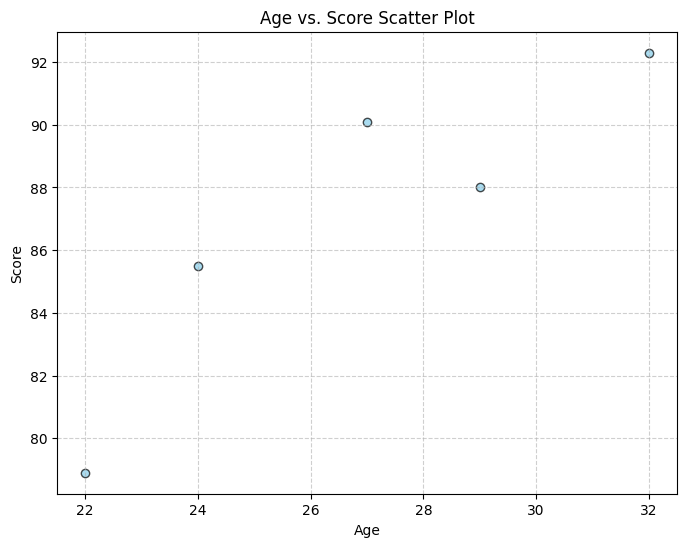

In [4]:
import matplotlib.pyplot as plt
import pandas as pd # Import pandas if df is not globally available in a new session

# Ensure df is available, creating it if necessary (e.g., if this is run in a new session)
# For this example, assuming 'df' from previous execution is in memory. If not,
# you would recreate it:
# data = {
#     'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
#     'Age': [24, 27, 22, 32, 29],
#     'Score': [85.5, 90.1, 78.9, 92.3, 88.0],
#     'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
# }
# df = pd.DataFrame(data)

# Create the scatter plot
plt.figure(figsize=(8, 6)) # Set the figure size
plt.scatter(df['Age'], df['Score'], color='skyblue', edgecolors='black', alpha=0.7)

# Add labels and title
plt.title('Age vs. Score Scatter Plot')
plt.xlabel('Age')
plt.ylabel('Score')

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

### Explanation:

1.  **`import matplotlib.pyplot as plt`**: This line imports the `pyplot` module from Matplotlib, which provides a MATLAB-like interface for plotting. It's conventionally aliased as `plt`.
2.  **`plt.figure(figsize=(8, 6))`**: This creates a new figure and sets its size to 8 inches by 6 inches, making the plot visually appealing.
3.  **`plt.scatter(df['Age'], df['Score'], ...)`**: This is the core function call for creating the scatter plot:
    *   `df['Age']`: Provides the data for the x-axis (Age).
    *   `df['Score']`: Provides the data for the y-axis (Score).
    *   `color='skyblue'`, `edgecolors='black'`, `alpha=0.7`: These are optional parameters to customize the appearance of the points. `alpha` controls the transparency.
4.  **`plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`**: These functions add a title to the plot and labels to the x and y axes, making the plot informative.
5.  **`plt.grid(True, linestyle='--', alpha=0.6)`**: This adds a grid to the plot, which can help in reading the values.
6.  **`plt.show()`**: This displays the generated plot. Without this line, the plot might not be shown, especially in environments outside of Jupyter notebooks.

# **4. How do you calculate the correlation matrix using Seaborn and visualize it with a heatmap?**

Here's how to calculate the correlation matrix using Seaborn and visualize it with a heatmap:

We will use the `df` DataFrame created earlier, which contains numerical columns like 'Age' and 'Score'.

Correlation Matrix:


,Age,Score
Age,1.000000,0.898029
Score,0.898029,1.000000


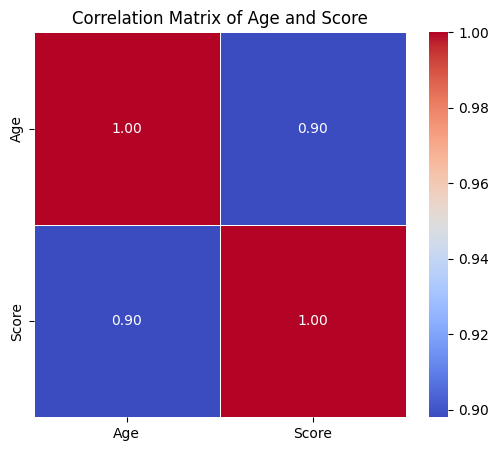

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure df is available. If running this cell independently, uncomment to recreate it:
# data = {
#     'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
#     'Age': [24, 27, 22, 32, 29],
#     'Score': [85.5, 90.1, 78.9, 92.3, 88.0],
#     'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
# }
# df = pd.DataFrame(data)

# 1. Calculate the correlation matrix
# By default, .corr() calculates pairwise correlation of columns, excluding non-numeric ones.
correlation_matrix = df.corr(numeric_only=True)

print("Correlation Matrix:")
display(correlation_matrix)

# 2. Visualize the correlation matrix with a heatmap
plt.figure(figsize=(6, 5)) # Set the figure size for better readability
sns.heatmap(correlation_matrix,
            annot=True,     # Show the correlation values on the heatmap
            cmap='coolwarm', # Choose a color map (e.g., 'coolwarm', 'viridis', 'plasma')
            fmt=".2f",      # Format the annotations to two decimal places
            linewidths=.5)  # Add lines between cells

plt.title('Correlation Matrix of Age and Score')
plt.show()

### Explanation:

1.  **`import seaborn as sns` and `import matplotlib.pyplot as plt`**: Imports the necessary libraries for visualization.
2.  **`correlation_matrix = df.corr(numeric_only=True)`**: This line calculates the pairwise correlation between all numerical columns in your DataFrame `df`. The `numeric_only=True` argument ensures that only numerical columns are considered for correlation calculation.
3.  **`print("Correlation Matrix:")` and `display(correlation_matrix)`**: Displays the calculated correlation matrix in a table format.
4.  **`plt.figure(figsize=(6, 5))`**: Creates a new figure for the plot and sets its size.
5.  **`sns.heatmap(...)`**: This is the core function for creating the heatmap:
    *   `correlation_matrix`: The data to be plotted (the correlation matrix itself).
    *   `annot=True`: Displays the correlation values on the heatmap cells.
    *   `cmap='coolwarm'`: Sets the color map. 'coolwarm' is a good choice for correlations as it clearly distinguishes positive (warm colors) from negative (cool colors) correlations, with white/light gray indicating weak correlation.
    *   `fmt=".2f"`: Formats the annotation text to two decimal places.
    *   `linewidths=.5`: Adds thin lines between the cells of the heatmap for better visual separation.
6.  **`plt.title(...)`**: Sets the title of the heatmap.
7.  **`plt.show()`**: Displays the generated heatmap.

# **5. Generate a bar plot using Plotly.**

Here's how to generate a bar plot using Plotly:

In [6]:
import plotly.express as px
import pandas as pd

# Ensure df is available. If running this cell independently, uncomment to recreate it:
# data = {
#     'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
#     'Age': [24, 27, 22, 32, 29],
#     'Score': [85.5, 90.1, 78.9, 92.3, 88.0],
#     'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
# }
# df = pd.DataFrame(data)

# Create the bar plot using plotly.express
fig = px.bar(df,
             x='Name',
             y='Score',
             title='Student Scores',
             color='Score', # Color bars based on score value
             labels={'Name': 'Student Name', 'Score': 'Obtained Score'})

# Customize the layout (optional)
fig.update_layout(
    xaxis_title='Student',
    yaxis_title='Score',
    font=dict(
        family="Arial, sans-serif",
        size=12,
        color="RebeccaPurple"
    )
)

# Display the plot
fig.show()

### Explanation:

1.  **`import plotly.express as px`**: Imports `plotly.express`, which is a high-level API for creating Plotly figures, making it very easy to generate common plot types.
2.  **`import pandas as pd`**: Imports the Pandas library, though `df` is assumed to be already in memory from previous steps.
3.  **`fig = px.bar(...)`**: This is the core function call to create the bar chart:
    *   `df`: The DataFrame containing the data.
    *   `x='Name'`: Specifies the 'Name' column for the x-axis (categories).
    *   `y='Score'`: Specifies the 'Score' column for the y-axis (values).
    *   `title='Student Scores'`: Sets the main title of the plot.
    *   `color='Score'`: Automatically colors the bars based on their 'Score' values, adding another visual dimension.
    *   `labels={...}`: Customizes the axis labels for better readability.
4.  **`fig.update_layout(...)`**: This is an optional step to further customize the plot's appearance, such as axis titles and font styles.
5.  **`fig.show()`**: Displays the interactive Plotly figure. This will typically render an interactive chart that you can zoom, pan, and hover over in your Colab environment or web browser.

# **6. Create a DataFrame and add a new column based on an existing column.**

Here's how to create a DataFrame and add a new column based on an existing column:

In [7]:
import pandas as pd

# Ensure df is available, creating it if necessary:
# For this example, assuming 'df' from previous execution is in memory.
# If not, you would recreate it:
# data = {
#     'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
#     'Age': [24, 27, 22, 32, 29],
#     'Score': [85.5, 90.1, 78.9, 92.3, 88.0],
#     'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
# }
# df = pd.DataFrame(data)

print("Original DataFrame:")
display(df)

# Add a new column 'Bonus_Score' based on the 'Score' column
# For example, let's add 5 points to each student's score as a bonus
df['Bonus_Score'] = df['Score'] + 5

print("\nDataFrame after adding 'Bonus_Score' column:")
display(df)

Original DataFrame:


,Name,Age,Score,City
0,Alice,24,85.5,New York
1,Bob,27,90.1,Los Angeles
2,Charlie,22,78.9,Chicago
3,David,32,92.3,Houston
4,Eve,29,88.0,Phoenix



DataFrame after adding 'Bonus_Score' column:


,Name,Age,Score,City,Bonus_Score
0,Alice,24,85.5,New York,90.5
1,Bob,27,90.1,Los Angeles,95.1
2,Charlie,22,78.9,Chicago,83.9
3,David,32,92.3,Houston,97.3
4,Eve,29,88.0,Phoenix,93.0


### Explanation:

1.  **`import pandas as pd`**: Imports the Pandas library.
2.  **`print("Original DataFrame:")` and `display(df)`**: This shows the DataFrame before any modifications, so you can see the initial state.
3.  **`df['Bonus_Score'] = df['Score'] + 5`**: This is the key line for creating the new column:
    *   `df['Bonus_Score']`: This syntax creates a new column named 'Bonus_Score' in the DataFrame `df`. If a column with this name already exists, it would be overwritten.
    *   `df['Score'] + 5`: This takes the existing 'Score' column, adds 5 to each value in that column (this is a *vectorized operation*), and assigns the result to the new 'Bonus_Score' column.
4.  **`print("\nDataFrame after adding 'Bonus_Score' column:")` and `display(df)`**: This displays the modified DataFrame, showing the newly added 'Bonus_Score' column and its calculated values.

# **7. Write a program to perform element-wise multiplication of two NumPy arrays.**

Here's a program to perform element-wise multiplication of two NumPy arrays:

In [8]:
import numpy as np

# Define two NumPy arrays
array1 = np.array([[1, 2, 3],
                   [4, 5, 6]])

array2 = np.array([[7, 8, 9],
                   [10, 11, 12]])

print("Array 1:")
display(array1)

print("\nArray 2:")
display(array2)

# Perform element-wise multiplication
# This can be done using the '*' operator or np.multiply()
result_array = array1 * array2

print("\nResult of element-wise multiplication:")
display(result_array)


Array 1:


array([[1, 2, 3],
       [4, 5, 6]])


Array 2:


array([[ 7,  8,  9],
       [10, 11, 12]])


Result of element-wise multiplication:


array([[ 7, 16, 27],
       [40, 55, 72]])

### Explanation:

1.  **`import numpy as np`**: Imports the NumPy library.
2.  **`array1 = np.array(...)` and `array2 = np.array(...)`**: These lines create two 2-dimensional NumPy arrays. For element-wise multiplication, the arrays must have compatible shapes. In this case, both are `(2, 3)` arrays, so they are directly compatible.
3.  **`print(...)` and `display(...)`**: These lines are used to show the content of the original arrays.
4.  **`result_array = array1 * array2`**: This is the core of the element-wise multiplication. NumPy's `ndarray` objects allow for direct use of arithmetic operators like `*` to perform element-wise operations. Behind the scenes, NumPy efficiently multiplies each corresponding element from `array1` and `array2`.
    *   `1 * 7 = 7`
    *   `2 * 8 = 16`
    *   ...and so on.
5.  **`print(...)` and `display(result_array)`**: Displays the resulting array after multiplication.

# **8. Create a line plot with multiple lines using Matplotlib.**

Here's how to create a line plot with multiple lines using Matplotlib:

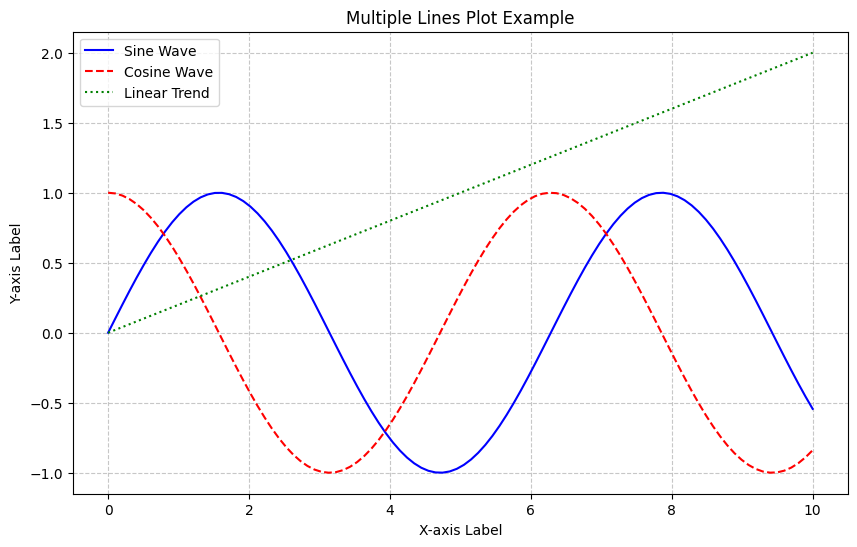

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Generate some sample data for multiple lines
x = np.linspace(0, 10, 100) # 100 points from 0 to 10
y1 = np.sin(x)             # First line: sine wave
y2 = np.cos(x)             # Second line: cosine wave
y3 = x / 5                 # Third line: linear trend

# 2. Create the plot
plt.figure(figsize=(10, 6)) # Set the figure size

# Plot each line
plt.plot(x, y1, label='Sine Wave', color='blue', linestyle='-')
plt.plot(x, y2, label='Cosine Wave', color='red', linestyle='--')
plt.plot(x, y3, label='Linear Trend', color='green', linestyle=':')

# 3. Add labels, title, and legend
plt.title('Multiple Lines Plot Example')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.legend() # Display the legend to identify each line
plt.grid(True, linestyle='--', alpha=0.7)

# 4. Show the plot
plt.show()

### Explanation:

1.  **`import matplotlib.pyplot as plt` and `import numpy as np`**: Imports the necessary libraries. `numpy` is used here to generate numerical data efficiently.
2.  **`x = np.linspace(0, 10, 100)`**: Creates 100 evenly spaced points between 0 and 10 for the x-axis.
3.  **`y1 = np.sin(x)`, `y2 = np.cos(x)`, `y3 = x / 5`**: Generates corresponding y-values for three different lines based on mathematical functions.
4.  **`plt.figure(figsize=(10, 6))`**: Initializes a figure with a specified size for better visualization.
5.  **`plt.plot(...)`**: This function is called multiple times, once for each line you want to plot.
    *   `x`, `y1` (or `y2`, `y3`): The x and y coordinates for each line.
    *   `label`: A string used to identify the line in the legend.
    *   `color`, `linestyle`: Optional arguments to customize the appearance of each line.
6.  **`plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`**: Sets the plot's title and axis labels for clarity.
7.  **`plt.legend()`**: Displays the legend, which uses the `label` arguments from the `plt.plot()` calls to identify each line.
8.  **`plt.grid(True, linestyle='--', alpha=0.7)`**: Adds a grid to the plot for easier reading of values.
9.  **`plt.show()`**: Displays the final plot.

# **9. Generate a Pandas DataFrame and filter rows where a column value is greater than a threshold.**


Here's how to generate a Pandas DataFrame and filter rows where a column value is greater than a threshold:

In [10]:
import pandas as pd

# Ensure df is available, creating it if necessary (e.g., if this is run in a new session)
# data = {
#     'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
#     'Age': [24, 27, 22, 32, 29],
#     'Score': [85.5, 90.1, 78.9, 92.3, 88.0],
#     'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
# }
# df = pd.DataFrame(data)

print("Original DataFrame:")
display(df)

# Define a threshold
score_threshold = 85.0

# Filter rows where 'Score' is greater than the threshold
filtered_df = df[df['Score'] > score_threshold]

print(f"\nDataFrame filtered for 'Score' > {score_threshold}:")
display(filtered_df)

Original DataFrame:


,Name,Age,Score,City,Bonus_Score
0,Alice,24,85.5,New York,90.5
1,Bob,27,90.1,Los Angeles,95.1
2,Charlie,22,78.9,Chicago,83.9
3,David,32,92.3,Houston,97.3
4,Eve,29,88.0,Phoenix,93.0



DataFrame filtered for 'Score' > 85.0:


,Name,Age,Score,City,Bonus_Score
0,Alice,24,85.5,New York,90.5
1,Bob,27,90.1,Los Angeles,95.1
3,David,32,92.3,Houston,97.3
4,Eve,29,88.0,Phoenix,93.0


### Explanation:

1.  **`import pandas as pd`**: Imports the Pandas library.
2.  **`print("Original DataFrame:")` and `display(df)`**: Displays the initial DataFrame before filtering.
3.  **`score_threshold = 85.0`**: Defines the threshold value you want to use for filtering.
4.  **`filtered_df = df[df['Score'] > score_threshold]`**: This is the core filtering operation:
    *   `df['Score'] > score_threshold` creates a boolean Series (e.g., `[True, True, False, True, True]`) where `True` indicates rows where the 'Score' is greater than 85.
    *   Passing this boolean Series inside the square brackets `df[...]` filters the DataFrame, returning only the rows where the corresponding boolean value is `True`.
5.  **`print(...)` and `display(filtered_df)`**: Displays the new DataFrame containing only the filtered rows.

# **10. Create a histogram using Seaborn to visualize a distribution.**

Here's how to create a histogram using Seaborn to visualize a distribution:

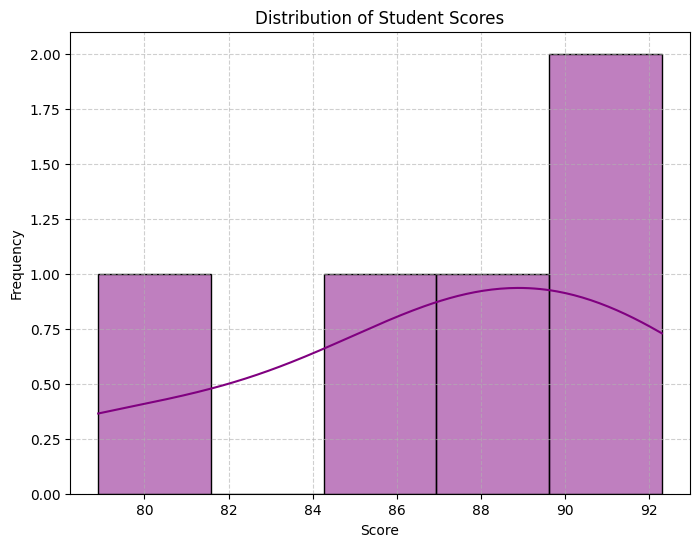

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure df is available. If running this cell independently, uncomment to recreate it:
# data = {
#     'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
#     'Age': [24, 27, 22, 32, 29],
#     'Score': [85.5, 90.1, 78.9, 92.3, 88.0],
#     'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
# }
# df = pd.DataFrame(data)

plt.figure(figsize=(8, 6)) # Set the figure size
sns.histplot(df['Score'], bins=5, kde=True, color='purple')

plt.title('Distribution of Student Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Explanation:

1.  **`import seaborn as sns` and `import matplotlib.pyplot as plt`**: Imports the necessary libraries for visualization.
2.  **`plt.figure(figsize=(8, 6))`**: Sets the size of the plot for better readability.
3.  **`sns.histplot(df['Score'], bins=5, kde=True, color='purple')`**: This is the core function call for creating the histogram:
    *   `df['Score']`: The data (a Series) whose distribution we want to visualize.
    *   `bins=5`: Specifies the number of bins (intervals) for the histogram. You can adjust this value.
    *   `kde=True`: Overlays a Kernel Density Estimate (KDE) curve on the histogram, which provides a smoothed representation of the distribution.
    *   `color='purple'`: Sets the color of the bars.
4.  **`plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`**: Sets the title and axis labels for clarity.
5.  **`plt.grid(...)`**: Adds a grid to the plot for easier interpretation.
6.  **`plt.show()`**: Displays the generated plot.

# **11. Perform matrix multiplication using NumPy.**

Here's how to perform matrix multiplication using NumPy:

In [12]:
import numpy as np

# Define two NumPy arrays (matrices)
# For matrix multiplication (dot product), the number of columns in the first matrix
# must be equal to the number of rows in the second matrix.
matrix1 = np.array([
    [1, 2, 3],
    [4, 5, 6]
]) # Shape (2, 3)

matrix2 = np.array([
    [7, 8],
    [9, 10],
    [11, 12]
]) # Shape (3, 2)

print("Matrix 1 (Shape:", matrix1.shape, "):")
display(matrix1)

print("\nMatrix 2 (Shape:", matrix2.shape, "):")
display(matrix2)

# Perform matrix multiplication
# Method 1: Using the @ operator (preferred for clarity in Python 3.5+)
result_matrix_at = matrix1 @ matrix2

# Method 2: Using np.dot() function
result_matrix_dot = np.dot(matrix1, matrix2)

print("\nResult of matrix multiplication (using @ operator):")
display(result_matrix_at)

print("\nResult of matrix multiplication (using np.dot()):")
display(result_matrix_dot)


Matrix 1 (Shape: (2, 3) ):


array([[1, 2, 3],
       [4, 5, 6]])


Matrix 2 (Shape: (3, 2) ):


array([[ 7,  8],
       [ 9, 10],
       [11, 12]])


Result of matrix multiplication (using @ operator):


array([[ 58,  64],
       [139, 154]])


Result of matrix multiplication (using np.dot()):


array([[ 58,  64],
       [139, 154]])

### Explanation:

1.  **`import numpy as np`**: Imports the NumPy library.
2.  **`matrix1 = np.array(...)` and `matrix2 = np.array(...)`**: These lines create two 2-dimensional NumPy arrays, which act as our matrices. It's crucial that for matrix multiplication, the number of columns in the first matrix (`matrix1.shape[1]`, which is 3) matches the number of rows in the second matrix (`matrix2.shape[0]`, which is also 3).
3.  **`print(...)` and `display(...)`**: These lines are used to show the content and shapes of the original matrices.
4.  **`result_matrix_at = matrix1 @ matrix2`**: This is the modern and preferred way to perform matrix multiplication in Python (since version 3.5) using the `@` operator. It's concise and clear.
5.  **`result_matrix_dot = np.dot(matrix1, matrix2)`**: This uses the `np.dot()` function, which is another common method for matrix multiplication. Both methods yield the same result.
6.  **`print(...)` and `display(...)`**: Displays the resulting matrix after multiplication.

The resulting matrix will have a shape determined by the number of rows in the first matrix and the number of columns in the second matrix (in this case, `(2, 2)`).

# **12. Use Pandas to load a CSV file and display its first 5 rows.**

Here's how to use Pandas to load a CSV file and display its first 5 rows:

In [13]:
import pandas as pd

# Replace 'path/to/your/file.csv' with the actual path to your CSV file
try:
    df_csv = pd.read_csv('/tmp/data.csv')
    print("DataFrame loaded successfully. First 5 rows:")
    display(df_csv.head())
except FileNotFoundError:
    print("Error: The specified CSV file was not found. Please make sure the path is correct.")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}")

Error: The specified CSV file was not found. Please make sure the path is correct.


### Explanation:

1.  **`import pandas as pd`**: Imports the Pandas library, commonly aliased as `pd`.
2.  **`df_csv = pd.read_csv('/tmp/data.csv')`**: This is the core function call:
    *   `pd.read_csv()` is a Pandas function specifically designed to read data from CSV files.
    *   You **must replace** `'/tmp/data.csv'` with the actual file path of your CSV data. If your CSV file is in your Google Drive, you'll need to mount your Drive first (e.g., `from google.colab import drive; drive.mount('/content/drive')`) and then provide the correct path.
3.  **`print("DataFrame loaded successfully. First 5 rows:")`**: A confirmation message.
4.  **`display(df_csv.head())`**: The `.head()` method returns the first 5 rows of the DataFrame by default. Using `display()` ensures a nicely formatted output in Colab.
5.  **`try...except` block**: This is included for robustness, to catch potential `FileNotFoundError` if the CSV path is incorrect or other general exceptions during file loading.

# **13. Create a 3D scatter plot using Plotly.**

Here's how to create a 3D scatter plot using Plotly:

In [14]:
import plotly.express as px
import pandas as pd
import numpy as np

# Ensure df is available and add a new random column for the third dimension
# For this example, assuming 'df' from previous execution is in memory.
# If not, you would recreate it:
# data = {
#     'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
#     'Age': [24, 27, 22, 32, 29],
#     'Score': [85.5, 90.1, 78.9, 92.3, 88.0],
#     'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
# }
# df = pd.DataFrame(data)

# Add a 'Random_Value' column for the Z-axis
df['Random_Value'] = np.random.randint(10, 100, size=len(df))

print("DataFrame with new 'Random_Value' column:")
display(df)

# Create the 3D scatter plot
fig = px.scatter_3d(df,
                    x='Age',
                    y='Score',
                    z='Random_Value',
                    color='Score', # Color points based on Score
                    size='Age',    # Vary point size based on Age
                    hover_name='Name', # Show Name on hover
                    title='3D Scatter Plot: Age vs. Score vs. Random Value')

# Customize the layout (optional)
fig.update_layout(
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Score',
        zaxis_title='Random Value'
    ),
    margin=dict(l=0, r=0, b=0, t=50)
)

# Display the plot
fig.show()

DataFrame with new 'Random_Value' column:


,Name,Age,Score,City,Bonus_Score,Random_Value
0,Alice,24,85.5,New York,90.5,72
1,Bob,27,90.1,Los Angeles,95.1,56
2,Charlie,22,78.9,Chicago,83.9,31
3,David,32,92.3,Houston,97.3,42
4,Eve,29,88.0,Phoenix,93.0,48


### Explanation:

1.  **`import plotly.express as px`, `import pandas as pd`, `import numpy as np`**: Imports the necessary libraries.
2.  **`df['Random_Value'] = np.random.randint(10, 100, size=len(df))`**: This line adds a new column named `Random_Value` to our `df` DataFrame. This column is populated with random integer values between 10 and 99, which will serve as the third dimension (Z-axis) for our 3D plot.
3.  **`fig = px.scatter_3d(...)`**: This is the core function call from `plotly.express` for creating a 3D scatter plot:
    *   `df`: The DataFrame containing the data.
    *   `x='Age'`, `y='Score'`, `z='Random_Value'`: Specifies the columns for the x, y, and z axes, respectively.
    *   `color='Score'`: Colors the data points based on their 'Score' values.
    *   `size='Age'`: Varies the size of the data points based on the 'Age' values.
    *   `hover_name='Name'`: Displays the 'Name' of the student when you hover over a data point.
    *   `title='3D Scatter Plot: Age vs. Score vs. Random Value'`: Sets the main title of the plot.
4.  **`fig.update_layout(...)`**: This optional step customizes the layout, specifically setting the titles for the axes in the 3D scene and adjusting margins.
5.  **`fig.show()`**: Displays the interactive 3D Plotly figure. In a Colab environment, you will see an interactive plot that you can rotate, zoom, and pan.